In [2]:
# loading important libraries
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance

# keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img

# optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

from sklearn.utils import shuffle

In [2]:
pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 95.2 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 181.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 215.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 170.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 102.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 260.9 MB/s  0:00:00
  Attempting uninstall: protobuf━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/16 [libclang]
    Found existing installation: protobuf 4.23.4━━━━━━━━━━━━━━  1/16 [libclang]
    Uninstalling protobuf-4.23.4:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/16 [libclang]
      Successfully uninstalled protobuf-4.23.4━━━━━━━━━━━━━━━━  1/16 [libclang]
  Attempting uninstall: tensorboard╸━━━━━━━━━━━━━━━━━  9/16 [h5py]ypes]
    Found existing installation: tensorboard 2.15.1━━━━━━━━━━━  9/16 [h5py]
    Uninstalling tensorboard-2.15.1:━━━━╸━━━━━━━ 13/16 [tens

In [6]:
!unzip "MRI Dataset.zip" -d dataset


Archive:  MRI Dataset.zip
   creating: dataset/MRI Dataset/
   creating: dataset/MRI Dataset/Testing/
   creating: dataset/MRI Dataset/Testing/glioma/
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0000.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0001.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0002.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0003.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0004.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0005.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0006.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0007.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0008.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-glTr_0009.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-gl_0010.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/Te-gl_0011.jpg  
  inflating: dataset/MRI Dataset/Testing/glioma/T

In [3]:
# loading the data
train_dir = 'dataset/MRI Dataset/Training/'
test_dir = 'dataset/MRI Dataset/Testing/'

In [4]:
# load and shuffle data
# train data
train_path = []
train_label = []

for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_path.append(os.path.join(train_dir, label, image))
        train_label.append(label)

train_path, train_label = shuffle(train_path, train_label)
train_path

# test data
test_path = []
test_label = []

for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_path.append(os.path.join(test_dir, label, image))
        test_label.append(label)

test_path, test_label = shuffle(test_path, test_label)
test_path

['dataset/MRI Dataset/Testing/notumor/Te-no_0158.jpg',
 'dataset/MRI Dataset/Testing/meningioma/Te-me_0161.jpg',
 'dataset/MRI Dataset/Testing/notumor/Te-no_0326.jpg',
 'dataset/MRI Dataset/Testing/glioma/Te-gl_0216.jpg',
 'dataset/MRI Dataset/Testing/pituitary/Te-pi_0188.jpg',
 'dataset/MRI Dataset/Testing/meningioma/Te-me_0160.jpg',
 'dataset/MRI Dataset/Testing/pituitary/Te-pi_0194.jpg',
 'dataset/MRI Dataset/Testing/pituitary/Te-pi_0042.jpg',
 'dataset/MRI Dataset/Testing/meningioma/Te-meTr_0006.jpg',
 'dataset/MRI Dataset/Testing/meningioma/Te-me_0144.jpg',
 'dataset/MRI Dataset/Testing/notumor/Te-no_0224.jpg',
 'dataset/MRI Dataset/Testing/glioma/Te-gl_0091.jpg',
 'dataset/MRI Dataset/Testing/notumor/Te-no_0330.jpg',
 'dataset/MRI Dataset/Testing/meningioma/Te-me_0281.jpg',
 'dataset/MRI Dataset/Testing/notumor/Te-no_0109.jpg',
 'dataset/MRI Dataset/Testing/glioma/Te-gl_0151.jpg',
 'dataset/MRI Dataset/Testing/pituitary/Te-pi_0274.jpg',
 'dataset/MRI Dataset/Testing/meningioma/Te

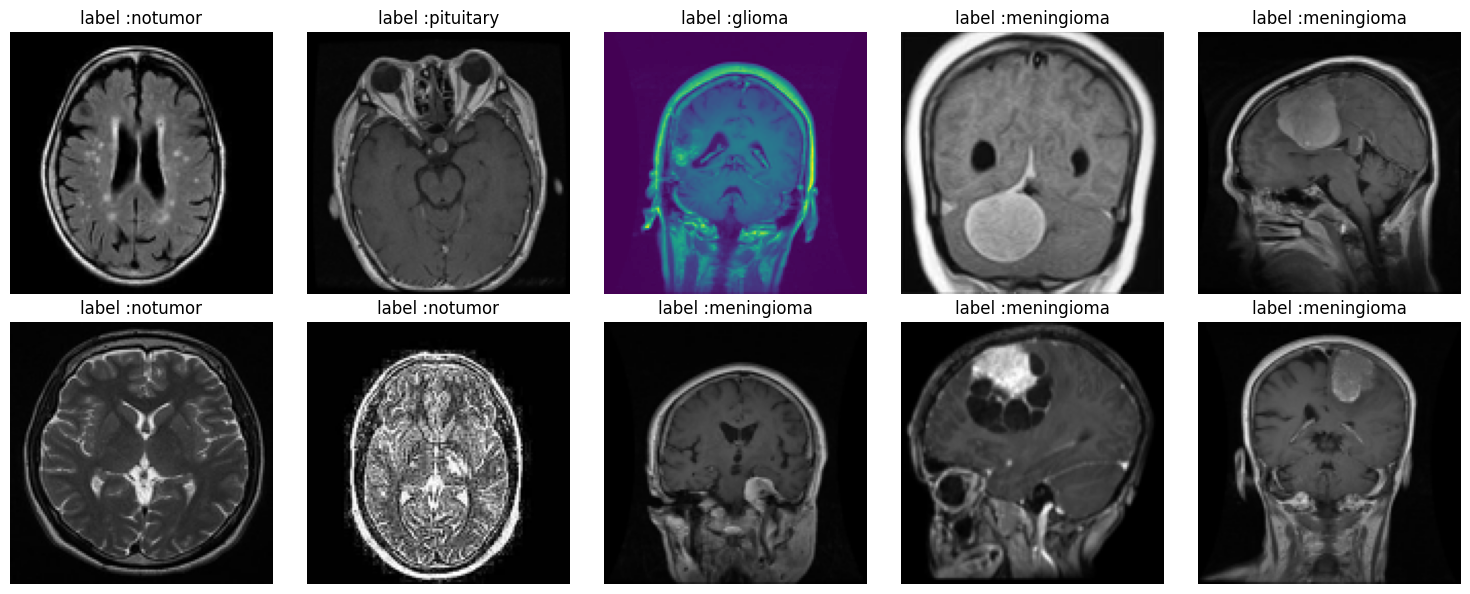

In [5]:
import matplotlib.pyplot as plt
import random

random_indices = random.sample(range(len(train_path)), 10)
random_indices

fig, axes = plt.subplots(2, 5, figsize=(15,6))
axes = axes.ravel() 

for i, ind in enumerate(random_indices):
    img_path = train_path[ind]
    img = Image.open(img_path)
    img = img.resize((128, 128))

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"label :{train_label[ind]}")

plt.tight_layout()
plt.show()

In [12]:
# Image Augmentation function
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))  # Random brightness
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))  # Random contrast
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encoding labels (convert label names to integers)
def encode_label(labels):
    unique_labels = os.listdir(train_dir)  # Ensure unique labels are determined
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)

# Data generator for batching
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)  # Open and augment images
            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)  # Encode labels
            yield batch_images, batch_labels  # Yield the batch

In [27]:
# Model architecture
IMAGE_SIZE = 128  # Image size (adjust based on your requirements)
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build the final model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))  # Input layer
model.add(base_model)  # Add VGG16 base model
model.add(Flatten())  # Flatten the output of the base model
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Parameters
batch_size = 20
steps = int(len(train_path) / batch_size)  # Steps per epoch
epochs = 15

# Train the model
history = model.fit(datagen(train_path, train_label, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.4379 - sparse_categorical_accuracy: 0.8326
Epoch 2/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.2331 - sparse_categorical_accuracy: 0.9104
Epoch 3/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1671 - sparse_categorical_accuracy: 0.9369
Epoch 4/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9575
Epoch 5/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9728
Epoch 6/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9819
Epoch 7/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9765
Epoch 8/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9865
Epoch 9/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0454 - sparse_categorical_accuracy: 0.9840
Epoch 10/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 2

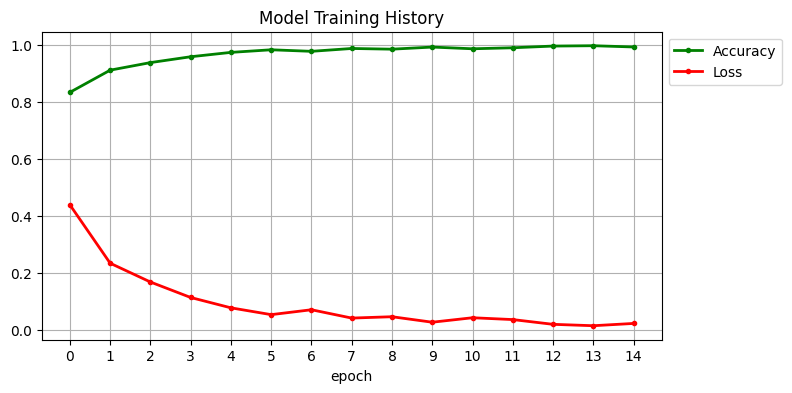

In [28]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

# 1. Prediction on test data
test_images = open_images(test_path)  # Load and augment test images
test_labels_encoded = encode_label(test_label)  # Encode the test labels

# Predict using the trained model
test_predictions = model.predict(test_images)

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       300
           1       0.95      0.98      0.97       306
           2       1.00      1.00      1.00       405
           3       1.00      0.99      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.99      0.98      0.98      1311



Confusion Matrix:
[[288  12   0   0]
 [  5 301   0   0]
 [  0   0 405   0]
 [  0   3   0 297]]


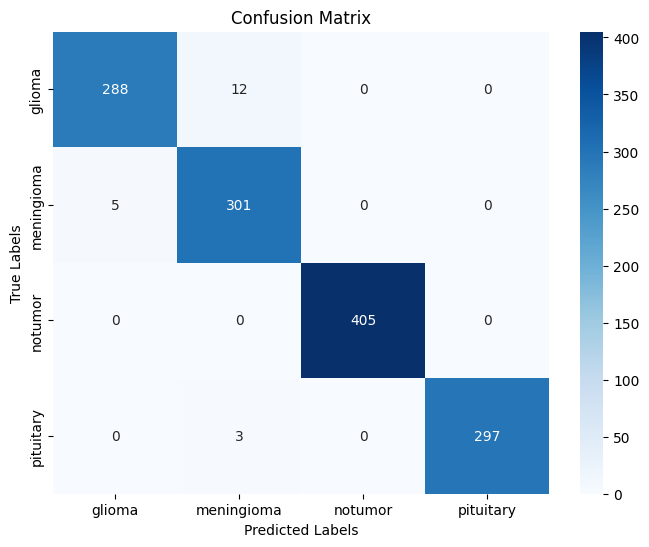

In [30]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

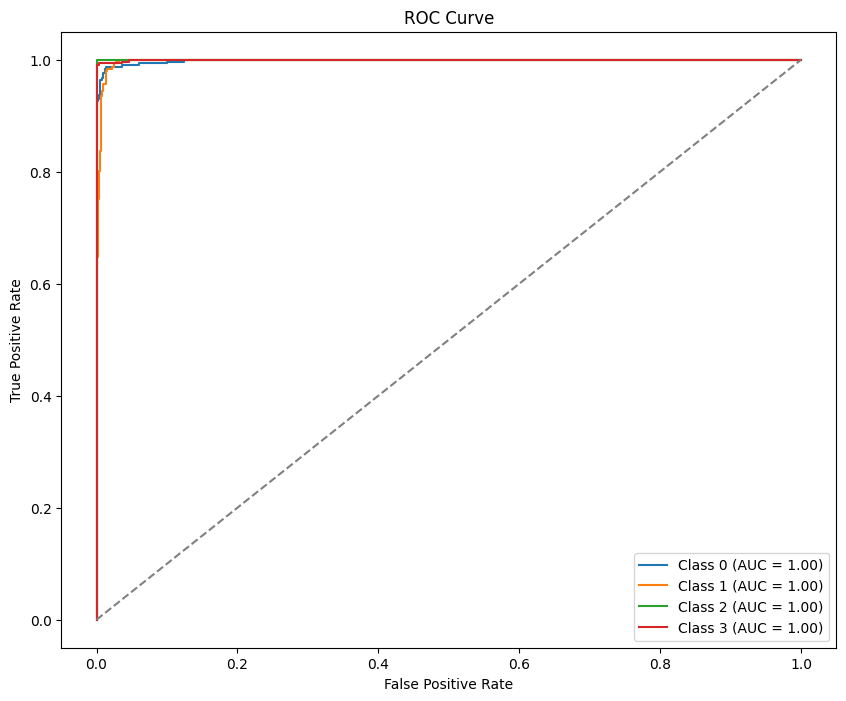

In [31]:
# 4. ROC Curve and AUC
# Binarize the test labels and predictions for multi-class ROC
test_labels_bin = label_binarize(test_labels_encoded, classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bin = test_predictions  # The predicted probabilities for each class

# Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(os.listdir(train_dir))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(os.listdir(train_dir))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [32]:
# Save the entire model
model.save('model.h5')

In [33]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

In [ ]:
## DETECT MRI IMAGES ##

In [34]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma']

def detect_and_display(img_path, model, image_size=128):
    """
    Function to detect tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows the predicted tumor class and confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


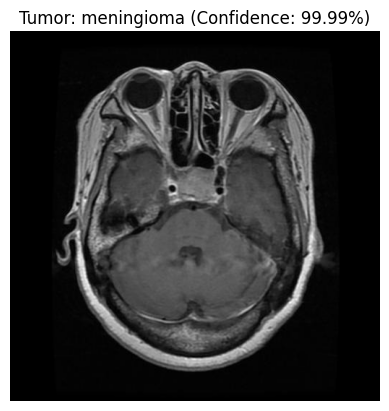

In [39]:
# Example usage
image_path = 'dataset/MRI Dataset/Testing/pituitary/Te-pi_0017.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)